In [1]:
import random
import math
import csv
import time
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from multiprocessing import Pool
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,top_k_accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multioutput import MultiOutputRegressor
from joblib import dump, load
from helper_func import analysis_func_expnum,analysis_func_layers,analysis_func_noise,perform_plot
from functools import partial

### Test effect of number of simulation on MAE, MSE and training time

In [56]:
num_exprs=[100,250,500,1000,2500,5000,10000,25000]#,50000,100000]
noise=0.01

#Define final MLP
model_single = MLPRegressor(random_state=1, max_iter=500,tol=0.001,early_stopping=True,activation='relu',alpha=0.000075,
               hidden_layer_sizes=(2048, 1024, 512, 256, 128, 64, 32),solver='adam',beta_1=0.5,beta_2=0.05,learning_rate='constant')
model = MultiOutputRegressor(model_single)
    

In [57]:
analysis_partial=partial(analysis_func_expnum,model=model,noise=noise)
p = Pool(processes=len(num_exprs))
results = p.map(analysis_partial, num_exprs)
p.close()
print(results)


[(100, 55.53299808502197, 0.057004690170288086, 0.03840708363519858, 0.12947138027163235, 0.15350019648838806, 0.3285768821311726), (250, 65.82699918746948, 0.13200044631958008, 0.014686882058669682, 0.0892402153745588, 0.08637725907842977, 0.27127205383257036), (500, 154.0619957447052, 0.399000883102417, 0.014639984924021587, 0.08251333508238584, 0.09211604720317361, 0.2530735165894238), (1000, 196.32499861717224, 0.04700207710266113, 0.021895236261986546, 0.07077679778597684, 0.10833932749175598, 0.2184902338317108), (2500, 362.2699944972992, 0.13300275802612305, 0.011499773518277863, 0.07035474819484654, 0.08624305855970767, 0.22572207884368684), (5000, 576.2549982070923, 0.17199993133544922, 0.01080011072508346, 0.07707438155276063, 0.08043187847794854, 0.23346501627007238), (10000, 961.7429797649384, 0.32700037956237793, 0.00876653720611501, 0.070665425623416, 0.07364340625140284, 0.22528107151050092), (25000, 1528.9539997577667, 0.4589989185333252, 0.008559531805481442, 0.0713286

In [58]:
#Save results
dump(results, 'mlp_number_of_sims_results.joblib')


['mlp_number_of_sims_results.joblib']

In [2]:
#Load results
results=load('models/mlp_number_of_sims_results.joblib')
df_num_exp = pd.DataFrame.from_records(
    results, columns=['Number of Experiments', "Fitting Time (sec)","Prediction Time (sec)","MSE Diameter","MSE SD","MAE Diameter","MAE SD"])

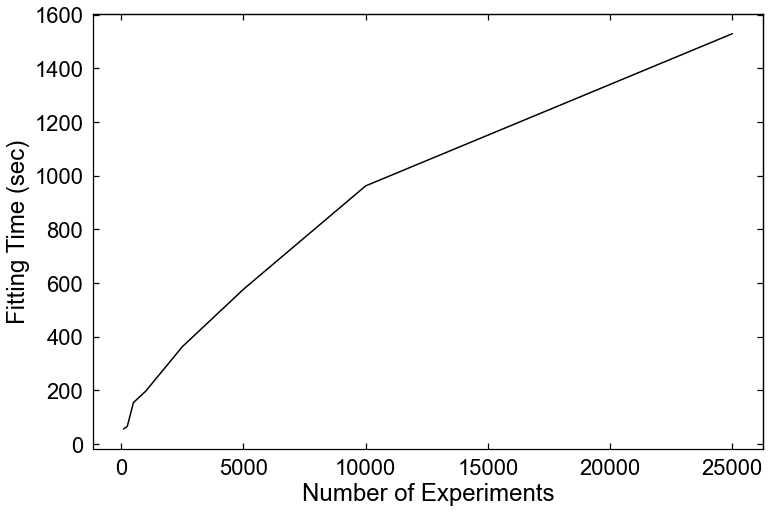

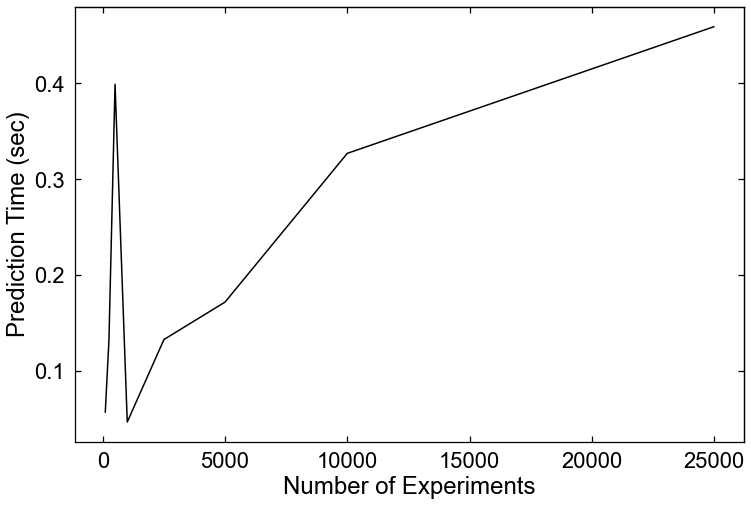

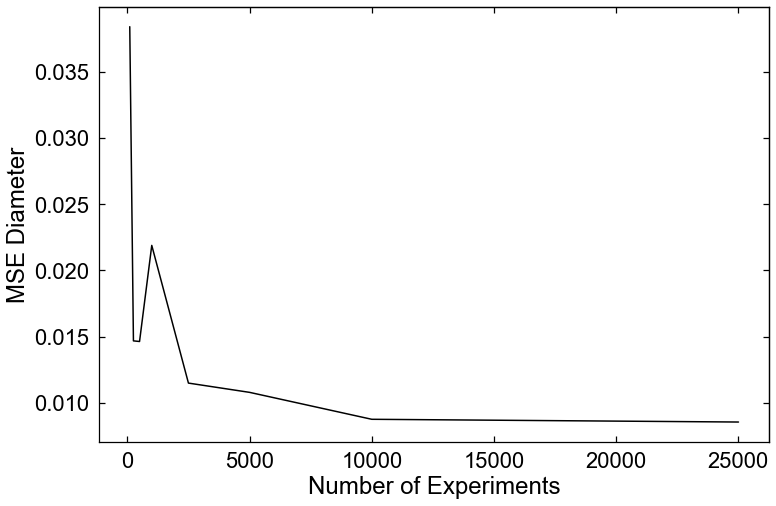

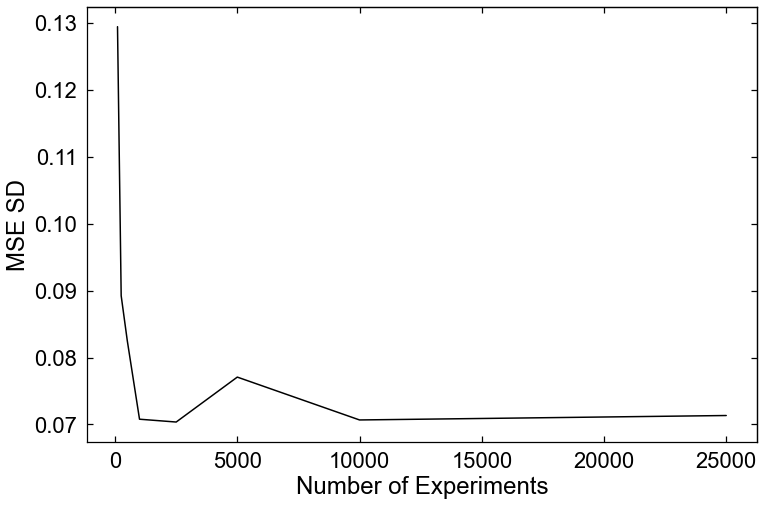

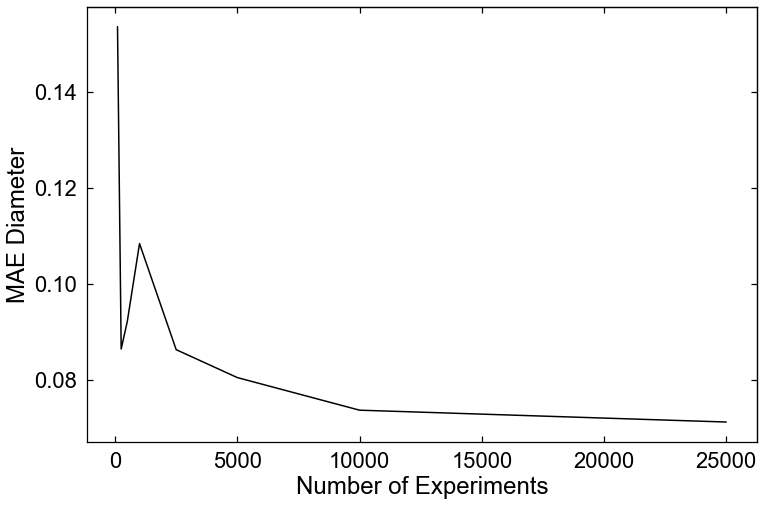

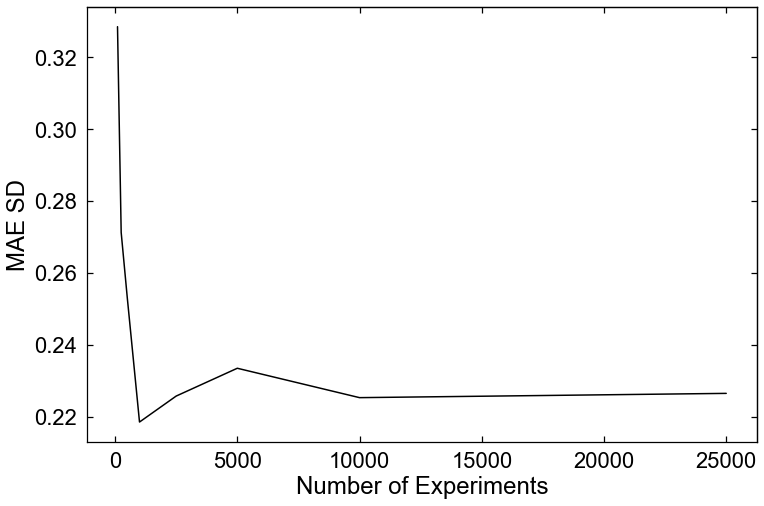

In [3]:
perform_plot(df_num_exp)

### Test effect of MLP complexity (number of layers number of nodes) to MAE, MSE,training time and prediction time

In [50]:
num_exprs=10000
noise=0.01
layers=[(64, 32),(128, 64, 32),(256, 128, 64, 32),(512, 256, 128, 64, 32),(1024, 512, 256, 128, 64, 32),(2048, 1024, 512, 256, 128, 64, 32),(4096,2048, 1024, 512, 256, 128, 64, 32)]


In [51]:
analysis_partial=partial(analysis_func_layers,num_exprs=num_exprs,noise=noise)
p = Pool(processes=len(layers))
results = p.map(analysis_partial, layers)
p.close()
print(results)

[((64, 32), 56.163270711898804, 0.011008262634277344, 0.01054684405118846, 0.07212489751941482, 0.0801874197259616, 0.22665559831489504), ((128, 64, 32), 126.35518002510071, 0.03299713134765625, 0.009068795527780484, 0.06993739139525948, 0.07543785454493077, 0.223991020889468), ((256, 128, 64, 32), 105.19776892662048, 0.092010498046875, 0.008785367715964916, 0.07037835846356129, 0.07385631198617813, 0.22539410315079078), ((512, 256, 128, 64, 32), 165.92584824562073, 0.08100032806396484, 0.008860343668016305, 0.07312365039628715, 0.07396887465587412, 0.22859376001021933), ((1024, 512, 256, 128, 64, 32), 322.6996192932129, 0.16300725936889648, 0.009237004726468061, 0.07114183877188143, 0.07586526515019898, 0.22689532781937546), ((2048, 1024, 512, 256, 128, 64, 32), 891.6205914020538, 0.3059985637664795, 0.00876653720611501, 0.070665425623416, 0.07364340625140284, 0.22528107151050092), ((4096, 2048, 1024, 512, 256, 128, 64, 32), 2652.4059977531433, 0.6999995708465576, 0.008898438985156751

In [52]:
#Save results
dump(results, 'mlp_number_of_layers_results.joblib')


['mlp_number_of_layers_results.joblib']

In [4]:
#Load results
results=load('models/mlp_number_of_layers_results.joblib')
df_layers = pd.DataFrame.from_records(
    results, columns=["Layers", "Fitting Time (sec)","Prediction Time (sec)","MSE Diameter","MSE SD","MAE Diameter","MAE SD"])
df_layers["Layers"]=df_layers["Layers"].apply(lambda x: len(x))

In [5]:
df_layers


,Layers,Fitting Time (sec),Prediction Time (sec),MSE Diameter,MSE SD,MAE Diameter,MAE SD
0,2,56.163271,0.011008,0.010547,0.072125,0.080187,0.226656
1,3,126.355180,0.032997,0.009069,0.069937,0.075438,0.223991
2,4,105.197769,0.092010,0.008785,0.070378,0.073856,0.225394
3,5,165.925848,0.081000,0.008860,0.073124,0.073969,0.228594
4,6,322.699619,0.163007,0.009237,0.071142,0.075865,0.226895
5,7,891.620591,0.305999,0.008767,0.070665,0.073643,0.225281
6,8,2652.405998,0.700000,0.008898,0.074055,0.074436,0.232738


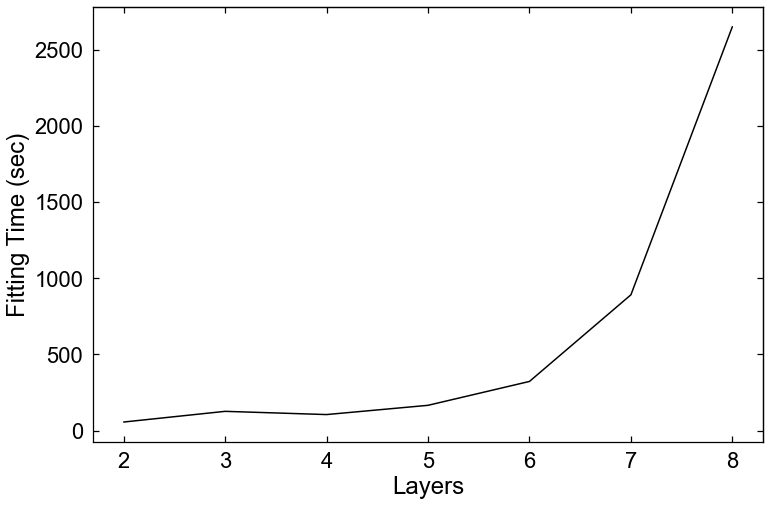

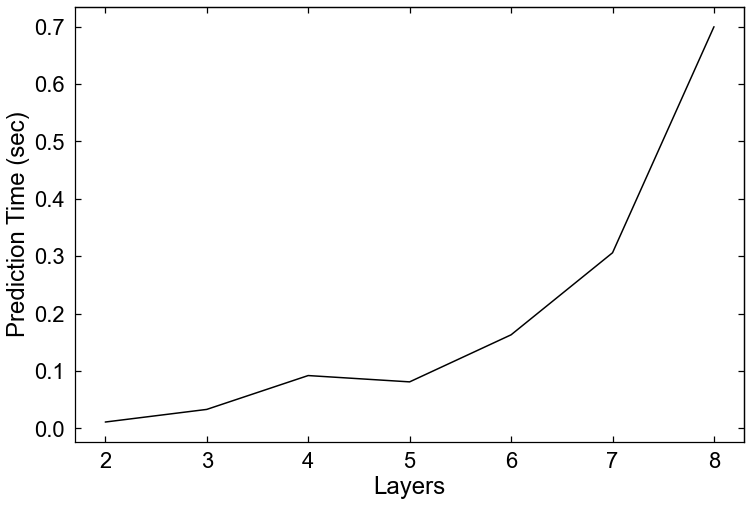

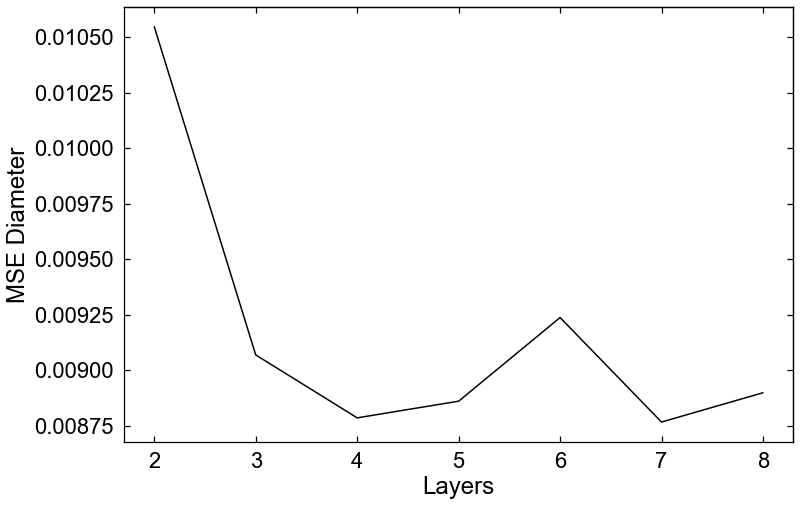

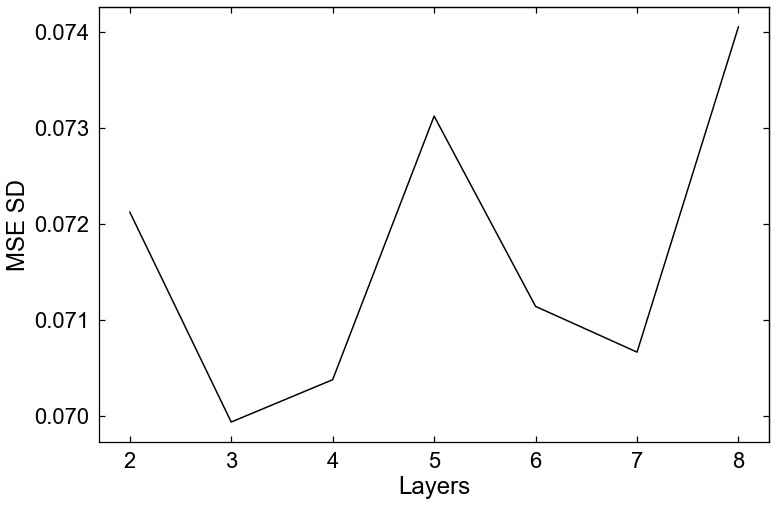

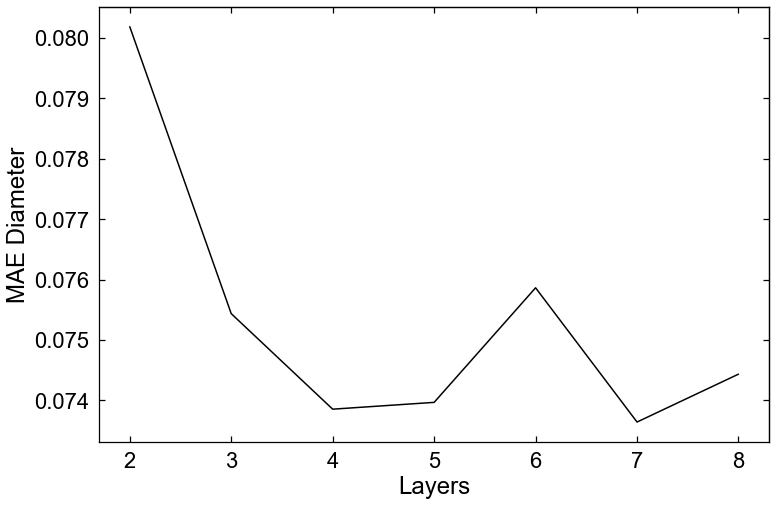

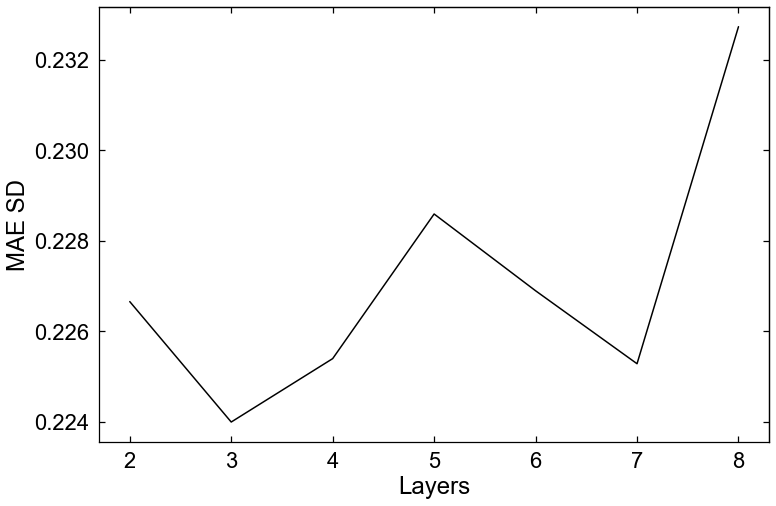

In [6]:
perform_plot(df_layers)

### Test effect of signal's noise on MAE and MSE

In [45]:
num_exprs=10000
noise=[0.001,0.0025,0.005,0.01,0.025,0.05,0.1,0.25,0.5]
#Define final MLP
model_single = MLPRegressor(random_state=1, max_iter=500,tol=0.001,early_stopping=True,activation='relu',alpha=0.000075,
               hidden_layer_sizes=(512, 256, 128, 64, 32),solver='adam',beta_1=0.5,beta_2=0.05,learning_rate='constant')
model = MultiOutputRegressor(model_single)

In [46]:
analysis_partial=partial(analysis_func_noise,model=model,exp=num_exprs)
p = Pool(processes=len(noise))
results = p.map(analysis_partial, noise)
p.close()
print(results)

[(0.001, 216.99345207214355, 0.028999805450439453, 0.005518049595331201, 0.04931854165999961, 0.056194924003998156, 0.17630154096702347), (0.0025, 176.21207284927368, 0.05102038383483887, 0.008502983857774616, 0.06488548912915086, 0.07207343137503869, 0.2112325156589297), (0.005, 192.9085397720337, 0.046999454498291016, 0.00787993220629652, 0.06551851485350968, 0.06889129781444597, 0.21409658592726397), (0.01, 195.67154812812805, 0.041996002197265625, 0.008860343668016305, 0.07312365039628715, 0.07396887465587412, 0.22859376001021933), (0.025, 148.43625569343567, 0.06800127029418945, 0.012589387476459737, 0.07727350281886894, 0.08484766259607565, 0.23614833285813888), (0.05, 170.28707122802734, 0.0670018196105957, 0.01595495381134225, 0.07872684193602607, 0.09931614552724574, 0.24169232836375834), (0.1, 135.22511744499207, 0.07151985168457031, 0.020133927405811637, 0.08376669516154447, 0.10917816958244404, 0.2498610480805106), (0.25, 157.5172688961029, 0.08699917793273926, 0.0209433396

In [47]:
#Save results
dump(results, 'mlp_noise_results.joblib')


['mlp_noise_results.joblib']

In [7]:
#Load results
results=load('models/mlp_noise_results.joblib')
df_noise = pd.DataFrame.from_records(
    results, columns=["Noise %", "Fitting Time (sec)","Prediction Time (sec)","MSE Diameter","MSE SD","MAE Diameter","MAE SD"])
df_noise["Noise %"]=df_noise["Noise %"]*100

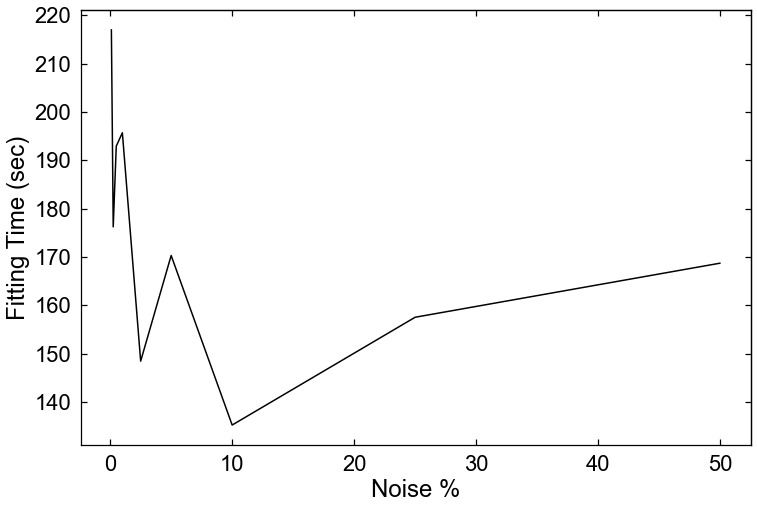

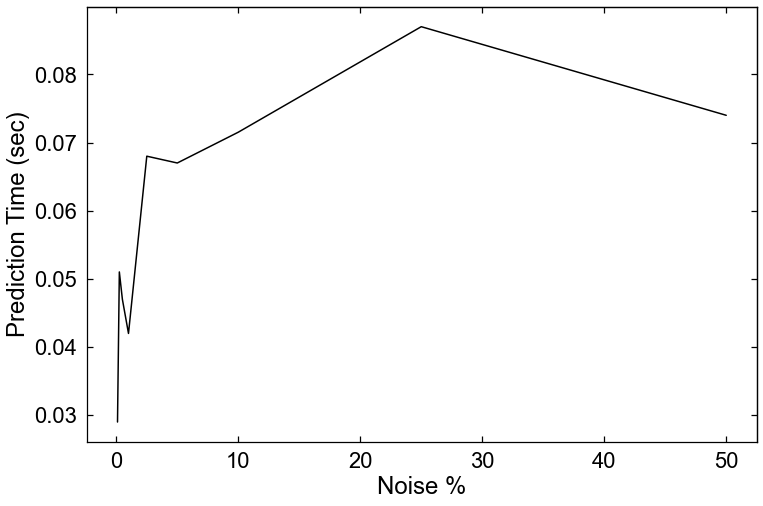

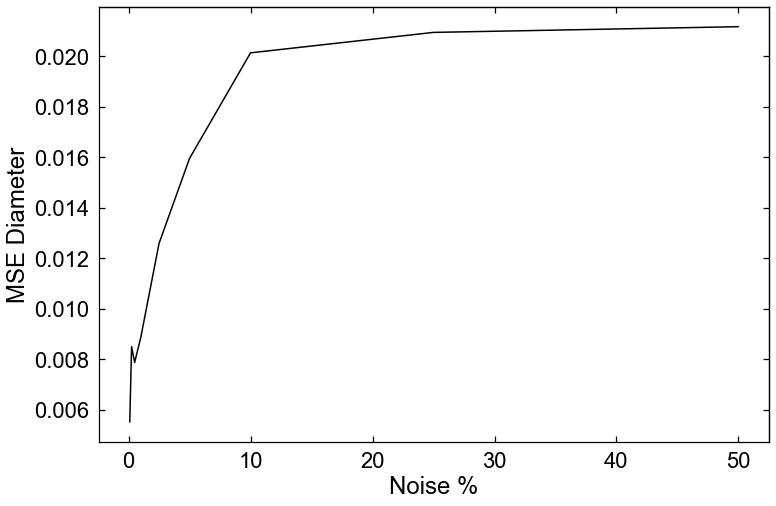

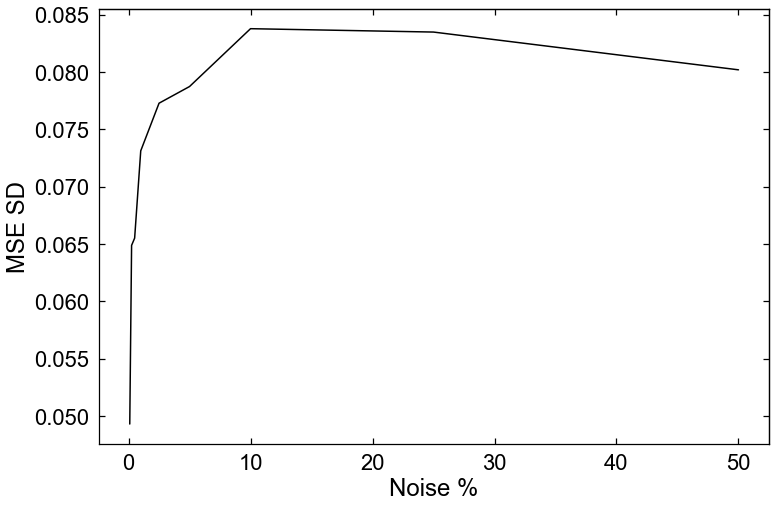

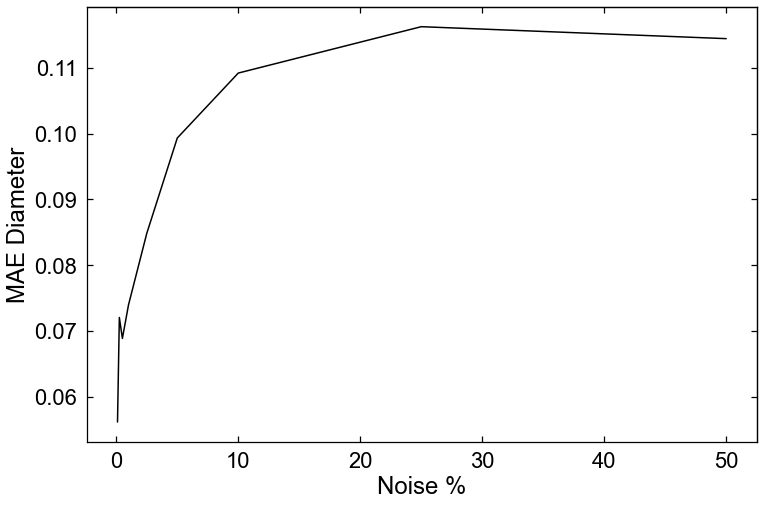

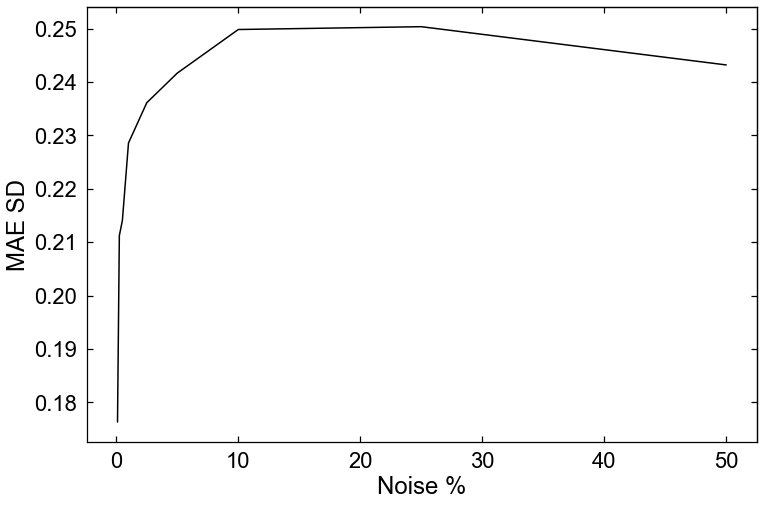

In [8]:
perform_plot(df_noise)